In [10]:
import pandas as pd
import glob
import os

directory = os.getcwd() + '/dataset'
print("Current Working Directory for the Dataset:", directory)

file_pattern = os.path.join(directory, '*.parquet')
files = glob.glob(file_pattern)
print(f"Files found: {files}")

if not files:
    print("No PARQUET files found in the specified directory.")
else:
    print(f"Found {len(files)} PARQUET files.")

    for file in files:
        try:
            df = pd.read_parquet(file)
            print(f"Header of {file}:")
            print(df.head())
        except Exception as e:
            print(f"Failed to load {file}: {e}")

Current Working Directory: /home/deep/data/NEU/ML/Project
Directory: /home/deep/data/NEU/ML/Project/dataset
Files found: ['/home/deep/data/NEU/ML/Project/dataset/yellow_tripdata_2024-03.parquet', '/home/deep/data/NEU/ML/Project/dataset/yellow_tripdata_2024-04.parquet', '/home/deep/data/NEU/ML/Project/dataset/yellow_tripdata_2024-02.parquet', '/home/deep/data/NEU/ML/Project/dataset/yellow_tripdata_2024-01.parquet']
Found 4 PARQUET files.
Header of /home/deep/data/NEU/ML/Project/dataset/yellow_tripdata_2024-03.parquet:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2024-03-01 00:18:51   2024-03-01 00:23:45              0.0   
1         1  2024-03-01 00:26:00   2024-03-01 00:29:06              0.0   
2         2  2024-03-01 00:09:22   2024-03-01 00:15:24              1.0   
3         2  2024-03-01 00:33:45   2024-03-01 00:39:34              1.0   
4         1  2024-03-01 00:05:43   2024-03-01 00:26:22              0.0   

   trip_distance  Ratecode

In [7]:
import pandas as pd
import glob
import os

# Define the directory where the files are located
directory = os.getcwd() + '/dataset'
print("Current Working Directory for the Dataset:", directory)

# Use glob to find all PARQUET files in the directory
file_pattern = os.path.join(directory, '*.parquet')
files = glob.glob(file_pattern)
print(f"Files found: {files}")

# Check if files are found
if not files:
    print("No PARQUET files found in the specified directory.")
else:
    print(f"Found {len(files)} PARQUET files.")

    # Process each file separately
    for file in files:
        try:
            # Load the PARQUET file
            df = pd.read_parquet(file)
            print(f"Loaded {file} successfully.")
            
            # Display the first few rows of the DataFrame
            # print(df.head())

            # Check for missing values
            print("Missing values in each column:")
            print(df.isnull().sum())

            # Save the cleaned and processed DataFrame as a CSV file
            output_file = os.path.splitext(file)[0] + '.csv'
            df.to_csv(output_file, index=False)
            print(f"Saved cleaned data to {output_file}")

        except Exception as e:
            print(f"Failed to process {file}: {e}")


Current Working Directory for the Dataset: /home/deep/data/NEU/ML/Project/dataset
Files found: ['/home/deep/data/NEU/ML/Project/dataset/yellow_tripdata_2024-01.parquet']
Found 1 PARQUET files.
Loaded /home/deep/data/NEU/ML/Project/dataset/yellow_tripdata_2024-01.parquet successfully.
Missing values in each column:
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64
Saved cleaned data to /home/deep/data/NEU/ML/Project/dataset/ye

/tmp/ipykernel_1132132/8164751.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


           VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.964624e+06     2.824462e+06   2.964624e+06  2.824462e+06   
mean   1.754204e+00     1.339281e+00   3.652169e+00  2.069359e+00   
std    4.325902e-01     8.502817e-01   2.254626e+02  9.823219e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    2.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.680000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.110000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.127223e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  2.964624e+06  2.964624e+06  2.964624e+06  2.964624e+06  2.964624e+06   
mean   1.660179e+02  1.651167e+02  1.161271e+00  1.817506e+01  1.451598e+00   
std    6.362391e+01  6.931535e+01  5.808686e-01  1.894955e+01  1.804102e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -8.990000e+02 

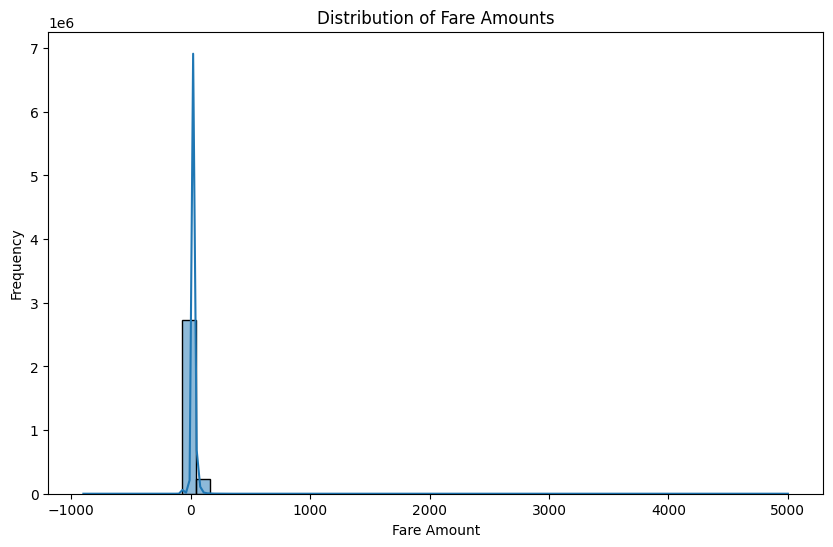

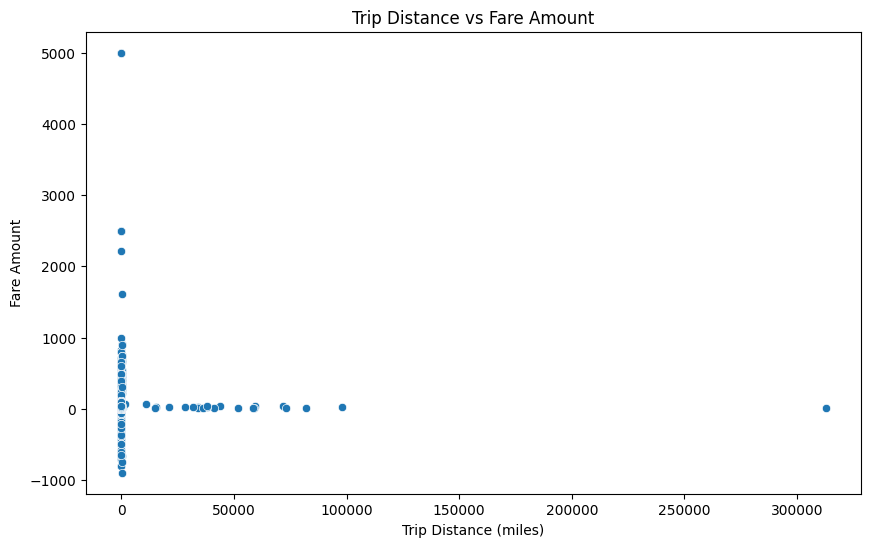

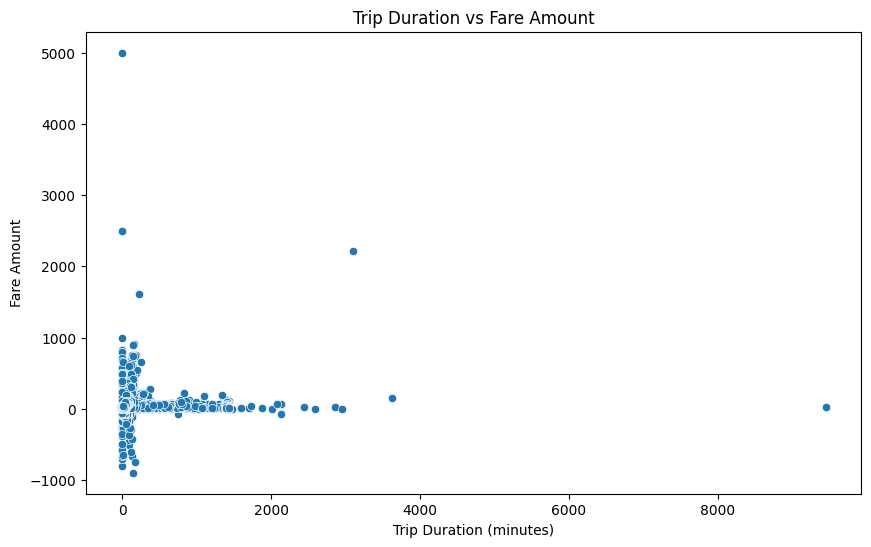

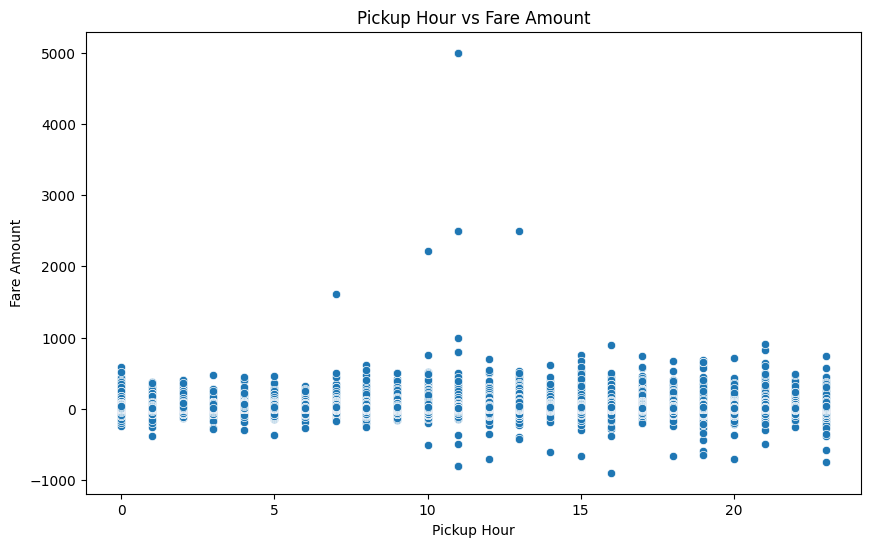

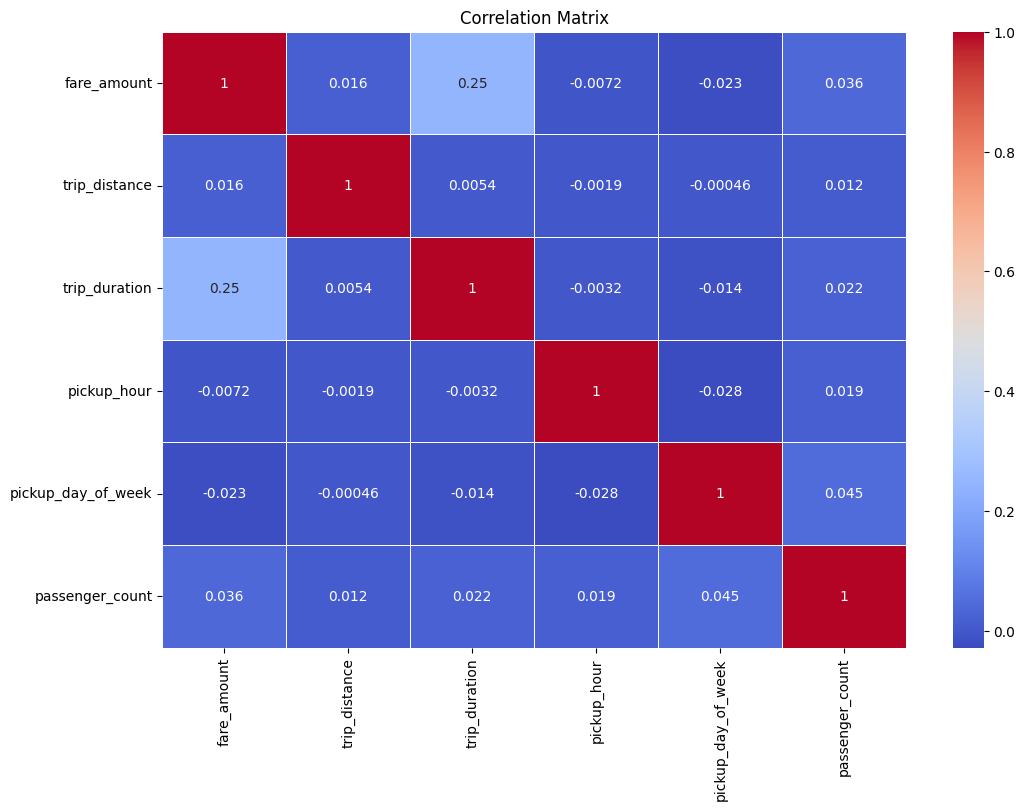

Training set size: (2371699, 5)
Testing set size: (592925, 5)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a Pandas DataFrame
file_path = 'dataset/yellow_tripdata_2024-01.csv'
df = pd.read_csv(file_path)

# Display basic statistics
print(df.describe())

# Convert pickup and dropoff datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create additional features
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Visualize the distribution of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of trip distance vs fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.show()

# Scatter plot of trip duration vs fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.show()

# Scatter plot of pickup hour vs fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_hour', y='fare_amount', data=df)
plt.title('Pickup Hour vs Fare Amount')
plt.xlabel('Pickup Hour')
plt.ylabel('Fare Amount')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[['fare_amount', 'trip_distance', 'trip_duration', 'pickup_hour', 'pickup_day_of_week', 'passenger_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Feature Selection: Choose relevant features for the model
features = ['trip_distance', 'trip_duration', 'pickup_hour', 'pickup_day_of_week', 'passenger_count']
X = df[features]
y = df['fare_amount']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Load the CSV data into a Pandas DataFrame
file_path = 'dataset/yellow_tripdata_2024-01.csv'
df = pd.read_csv(file_path)

# Display basic statistics
print(df.describe())

# Convert pickup and dropoff datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create additional features with progress bar
for _ in tqdm(range(1), desc="Creating additional features"):
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Feature Selection: Choose relevant features for the model
features = ['trip_distance', 'trip_duration', 'pickup_hour', 'pickup_day_of_week', 'passenger_count', 
            'RatecodeID', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
            'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Convert categorical features to numerical if necessary
df['RatecodeID'] = df['RatecodeID'].astype('category').cat.codes
df['payment_type'] = df['payment_type'].astype('category').cat.codes
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category').cat.codes

# Select relevant features
X = df[features]
y = df['fare_amount']

# Split the data into training and testing sets with progress bar
with tqdm(total=1, desc="Splitting data") as pbar:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pbar.update(1)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Train a Random Forest model with progress bar
from sklearn.ensemble import RandomForestRegressor

with tqdm(total=1, desc="Training Random Forest model") as pbar:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    pbar.update(1)

# Predict on the test set
with tqdm(total=1, desc="Predicting with Random Forest model") as pbar:
    y_pred_rf = rf_model.predict(X_test)
    pbar.update(1)

# Evaluate the Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")


/tmp/ipykernel_1134273/403012402.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


           VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.964624e+06     2.824462e+06   2.964624e+06  2.824462e+06   
mean   1.754204e+00     1.339281e+00   3.652169e+00  2.069359e+00   
std    4.325902e-01     8.502817e-01   2.254626e+02  9.823219e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    2.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.680000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.110000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.127223e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  2.964624e+06  2.964624e+06  2.964624e+06  2.964624e+06  2.964624e+06   
mean   1.660179e+02  1.651167e+02  1.161271e+00  1.817506e+01  1.451598e+00   
std    6.362391e+01  6.931535e+01  5.808686e-01  1.894955e+01  1.804102e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -8.990000e+02 

Splitting data: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


Training set size: (2371699, 14)
Testing set size: (592925, 14)


Training Random Forest model:   0%|          | 0/1 [00:00<?, ?it/s]

: 